## Urban air pollution project


### TOC (table of content)
1. [Load packages](#loading_packages)
2. [Load data](#loading_data)
3. [EDA technical](#technical_eda)
4. [Hypothesis](#hypothesis)
5. [Feature engineering](#feature_engineering)
6. [Machine Learning Pipeline](#pipeline)
7. [Baseline Model](#dummy)
8. [Prediction Results](#prediction)


<a id='loading_packages'/>

Loading packages

In [158]:
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates
from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingRegressor, StackingRegressor, AdaBoostRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay, classification_report, accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


import lightgbm as lgb

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import numpy as np
import seaborn as sns
import warnings
import xgboost as xgb
import pandas as pd

%matplotlib inline
# Pretty display for notebooks
RSEED=42
sns.set(style="whitegrid", color_codes=True)
warnings.filterwarnings("ignore")

## TOC
### Import data

<a id='loading_data'/>

Loading Data

In [10]:
df = pd.read_csv('data/Train.csv')

<a id='technical_eda'/>

EDA Technical

In [11]:
pd.set_option('display.max_rows',10)
df.columns


Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [12]:
df.shape

(30557, 82)

In [13]:
df.dtypes

Place_ID X Date                  object
Date                             object
Place_ID                         object
target                          float64
target_min                      float64
                                 ...   
L3_CH4_aerosol_optical_depth    float64
L3_CH4_sensor_azimuth_angle     float64
L3_CH4_sensor_zenith_angle      float64
L3_CH4_solar_azimuth_angle      float64
L3_CH4_solar_zenith_angle       float64
Length: 82, dtype: object

In [14]:
df.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [15]:
df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.isnull().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

In [17]:
df.duplicated().value_counts()

False    30557
Name: count, dtype: int64

#### check outliers for target

<Axes: xlabel='target', ylabel='Count'>

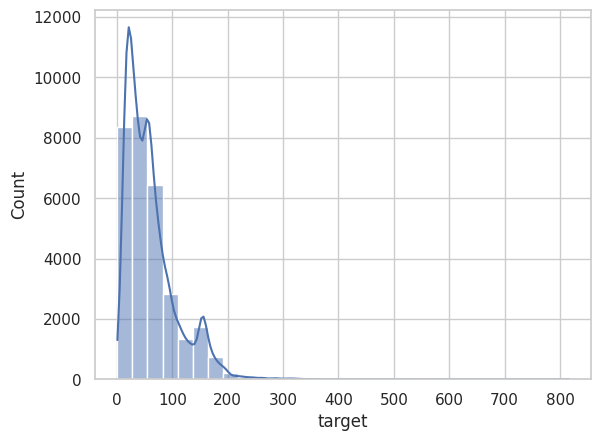

In [18]:
sns.histplot(df, x='target', bins=30, kde=True)

<Axes: >

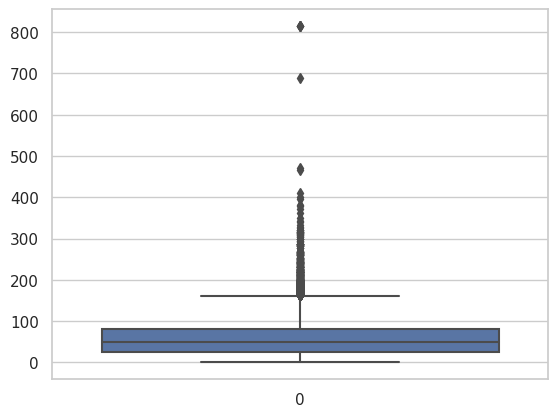

In [19]:
sns.boxplot(df['target'])

we see that the data are exponentially distributed. The box plot shows very high amount of outliers. However, because of the exponential distribution, we can log transfor the target value to reduce the number of 'actual' outliers.

<Axes: >

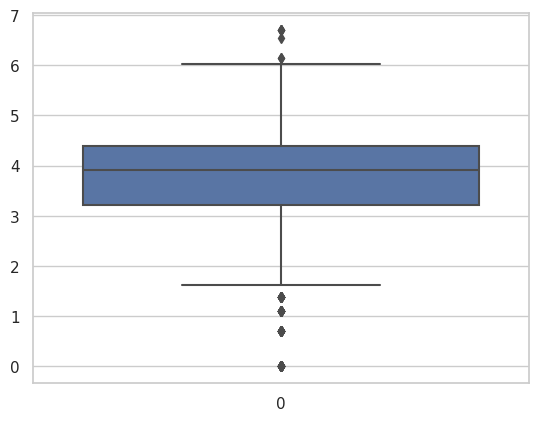

In [20]:
sns.boxplot(df['target'].apply(np.log))

Conclusion is we need to set the treshold: the following code calculates the maximum value for the target that we will use for the training. (this is: we remove the highest seven points).

In [21]:
q1=df['target'].apply(np.log).quantile(0.25)
q3=df['target'].apply(np.log).quantile(0.75)
IQR=q3-q1
max_target = np.exp((q3+1.5*IQR)) 
print(max_target)

457.9467217919567


Hypothsis
<a id='hypothesis'/>

- higher gas column densities, higher target value
- Q: higher wind velocity, lower target value?
- humidity correlated non-linearly with target value
- satellite angle correlates with measured column density
- stratospheric column density no correlation with target value
- aerosol index with target value
- AER_AI_sensor_altitude  nega-corr target value

H1: higher gas column densities, higher target value

In [22]:
df.corr(numeric_only=True).iloc[0].sort_values(ascending=False)

target                                             1.000000
target_min                                         0.818803
target_max                                         0.630801
L3_CO_CO_column_number_density                     0.375737
L3_HCHO_tropospheric_HCHO_column_number_density    0.347125
                                                     ...   
L3_HCHO_solar_azimuth_angle                       -0.181548
L3_O3_solar_azimuth_angle                         -0.185363
L3_CLOUD_solar_azimuth_angle                      -0.187643
L3_AER_AI_solar_azimuth_angle                     -0.193434
L3_AER_AI_sensor_altitude                         -0.308308
Name: target, Length: 79, dtype: float64

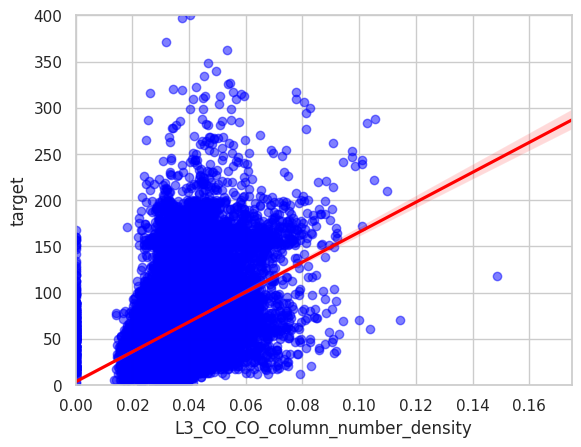

In [23]:
sns.regplot(df, x = 'L3_CO_CO_column_number_density', y = 'target',
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}
           )
plt.xlim(0, 0.175)
plt.ylim(0, 400)
plt.show()

Text(0, 0.5, 'Pollution Index')

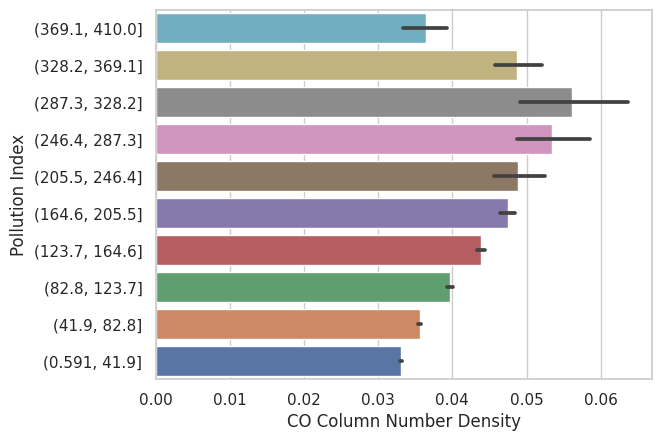

In [24]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_CO_CO_column_number_density', y='target_bins').invert_yaxis()
plt.xlabel('CO Column Number Density')
plt.ylabel('Pollution Index')


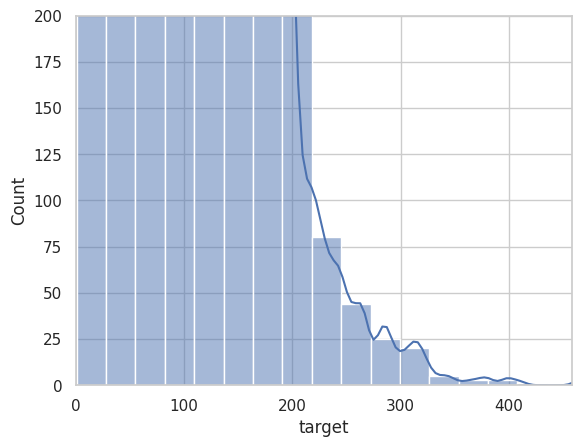

In [25]:
sns.histplot(df, x='target', bins=30, kde=True)
plt.xlim(0, 458)
plt.ylim(0, 200)
plt.show()

- the traget value is increasing until 328.2 with co_column_number_density
- we have less data point above 200 

(array([0.0e+00, 5.0e-05, 1.0e-04, 1.5e-04, 2.0e-04, 2.5e-04, 3.0e-04,
        3.5e-04, 4.0e-04]),
 [Text(0.0, 0, '0.00000'),
  Text(5e-05, 0, '0.00005'),
  Text(0.0001, 0, '0.00010'),
  Text(0.00015000000000000001, 0, '0.00015'),
  Text(0.0002, 0, '0.00020'),
  Text(0.00025, 0, '0.00025'),
  Text(0.00030000000000000003, 0, '0.00030'),
  Text(0.00035, 0, '0.00035'),
  Text(0.0004, 0, '0.00040')])

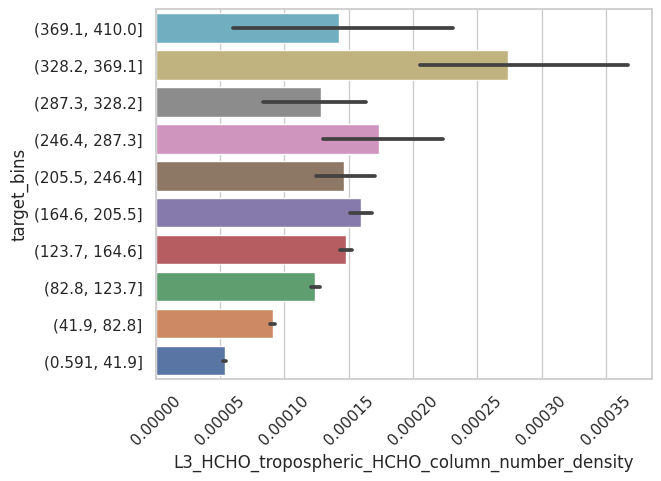

In [26]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_HCHO_tropospheric_HCHO_column_number_density', y='target_bins').invert_yaxis()
plt.xticks(rotation=45)

(array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
        0.0008, 0.0009]),
 [Text(0.0, 0, '0.0000'),
  Text(0.0001, 0, '0.0001'),
  Text(0.0002, 0, '0.0002'),
  Text(0.00030000000000000003, 0, '0.0003'),
  Text(0.0004, 0, '0.0004'),
  Text(0.0005, 0, '0.0005'),
  Text(0.0006000000000000001, 0, '0.0006'),
  Text(0.0007, 0, '0.0007'),
  Text(0.0008, 0, '0.0008'),
  Text(0.0009000000000000001, 0, '0.0009')])

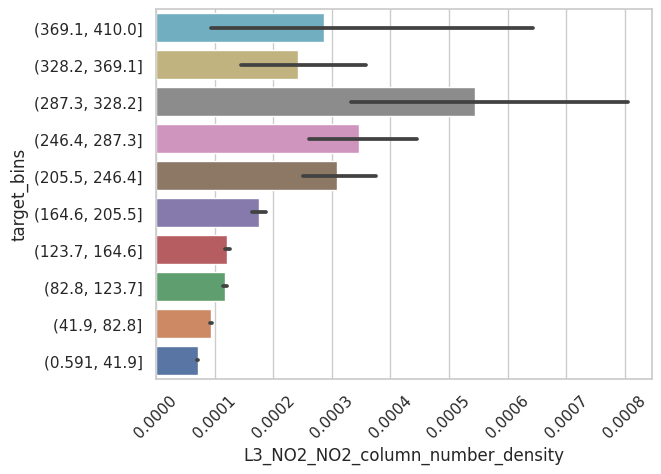

In [27]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_NO2_NO2_column_number_density', y='target_bins').invert_yaxis()
plt.xticks(rotation=45)

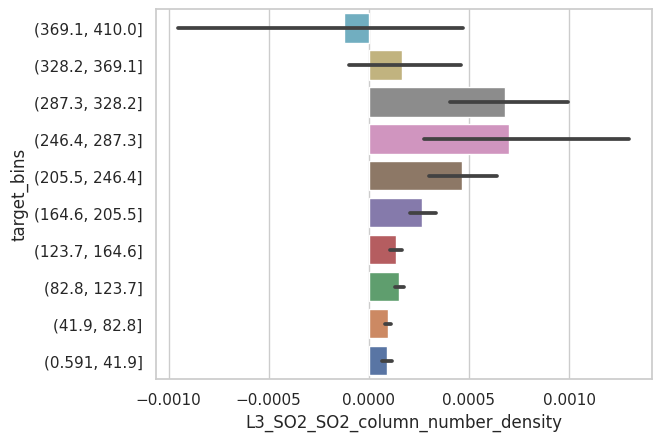

In [28]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_SO2_SO2_column_number_density', y='target_bins').invert_yaxis()

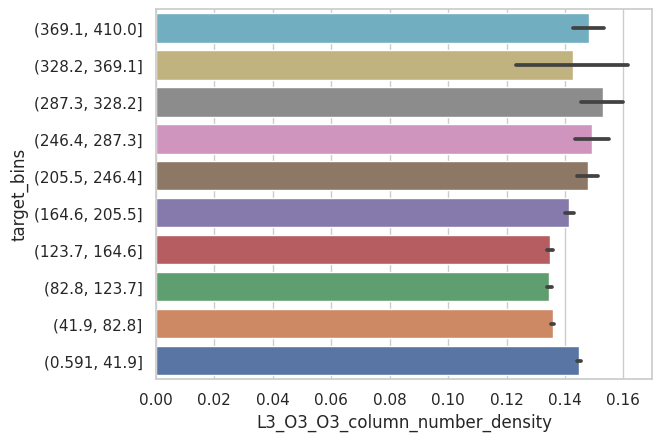

In [29]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_O3_O3_column_number_density', y='target_bins').invert_yaxis()

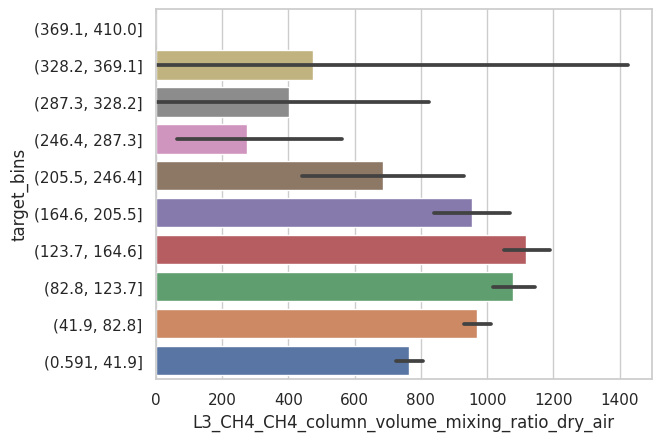

In [30]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_CH4_CH4_column_volume_mixing_ratio_dry_air', y='target_bins').invert_yaxis()

Conclusion : H1: higher gas column densities, higher target value: Yes. We look at the data points from 0-200 (afterward it is unreliable)

H2: - Q: higher wind velocity, lower target value?
    A: true

In [31]:
df_abs = df_temp.copy()
df_abs['u_component_of_wind_10m_above_ground'] = df_temp['u_component_of_wind_10m_above_ground'].abs()

Text(0, 0.5, 'Pollution Index')

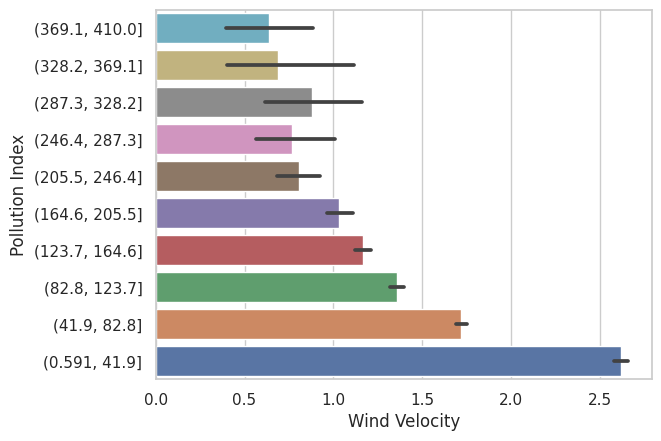

In [32]:
sns.barplot(df_abs, x='u_component_of_wind_10m_above_ground', y='target_bins').invert_yaxis()
plt.xlabel('Wind Velocity')
plt.ylabel('Pollution Index')


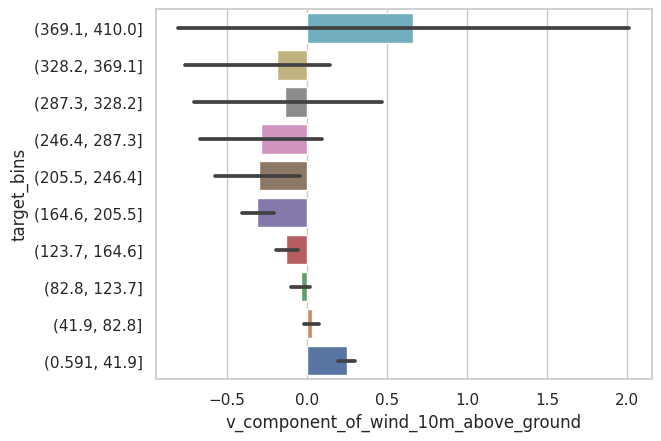

In [33]:
sns.barplot(df_temp, x='v_component_of_wind_10m_above_ground', y='target_bins').invert_yaxis()

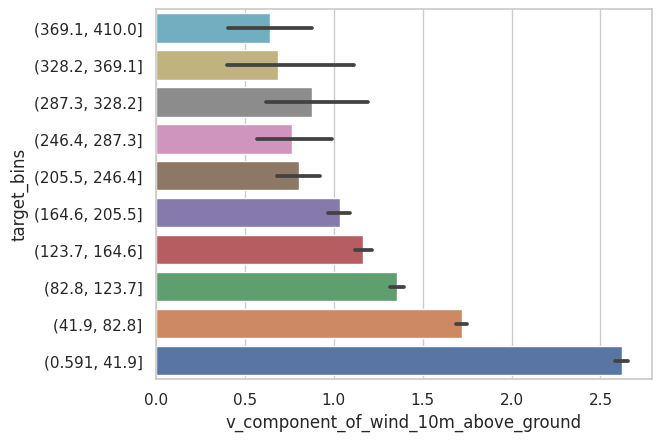

In [34]:
df_abs = df_temp.copy()
df_abs['v_component_of_wind_10m_above_ground'] = df_temp['u_component_of_wind_10m_above_ground'].abs()

sns.barplot(df_abs, x='v_component_of_wind_10m_above_ground', y='target_bins').invert_yaxis()

The more wind the cleaner the air

H3: - humidity correlated non-linearly with target value

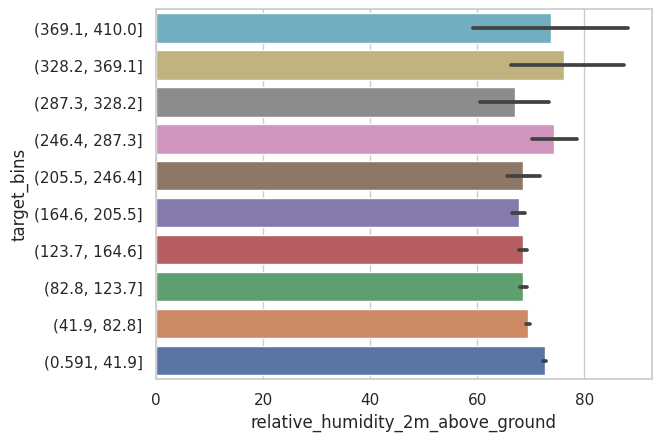

In [35]:
sns.barplot(df_temp, x='relative_humidity_2m_above_ground', y='target_bins').invert_yaxis()
#plt.xlim(60, 100)
#plt.show()

H3
- a small change in humdidity makes a big change in pollution but most humidity values are within each others range (error range), so there is maby no dependency at all


H4: satellite angle correlates with the target value (measured column density)

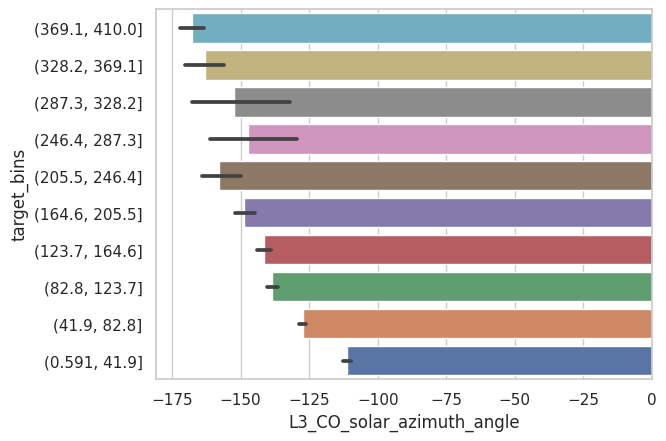

In [36]:
sns.barplot(df_temp, x='L3_CO_solar_azimuth_angle', y='target_bins').invert_yaxis()

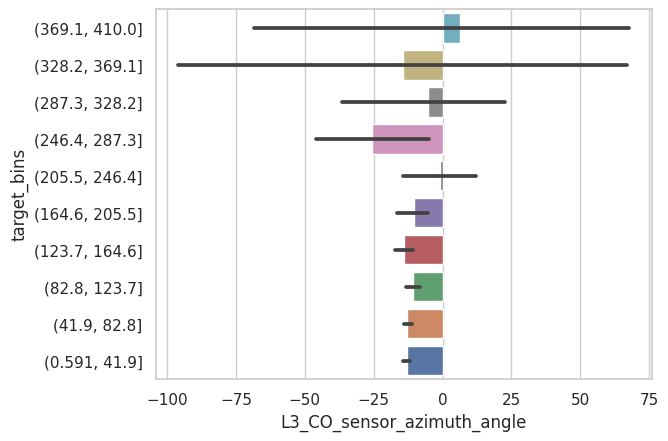

In [37]:
sns.barplot(df_temp, x='L3_CO_sensor_azimuth_angle', y='target_bins').invert_yaxis()


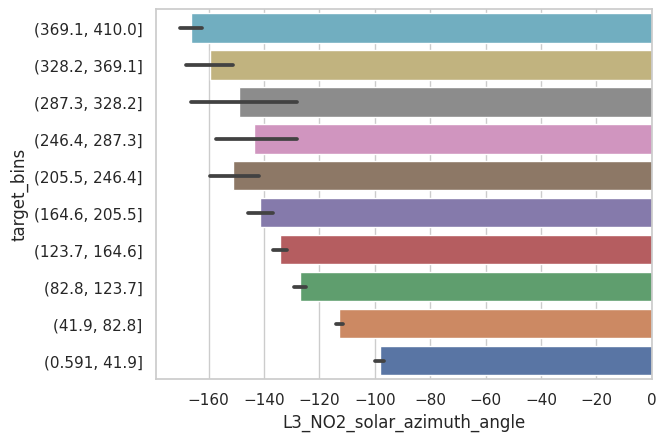

In [38]:
sns.barplot(df_temp, x='L3_NO2_solar_azimuth_angle', y='target_bins').invert_yaxis()

(815000.0, 844553.1211771137)

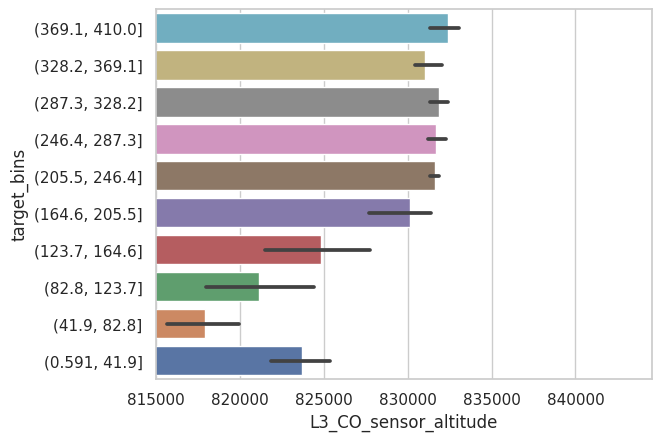

In [39]:
sns.barplot(df_temp, x='L3_CO_sensor_altitude', y='target_bins').invert_yaxis()
plt.xlim(815000, df_temp['L3_CO_sensor_altitude'].max())

- solar_azimuth_angle: The pollution seems to depend on the position of the sun and that means the time of the day (?)
- sensor_azimuth_ angle: The pollution seems not depend on the sensor azimuth angle
- sensor_altitude: there is a a non-linear dependency



H5: stratospheric column density no correlation with target value

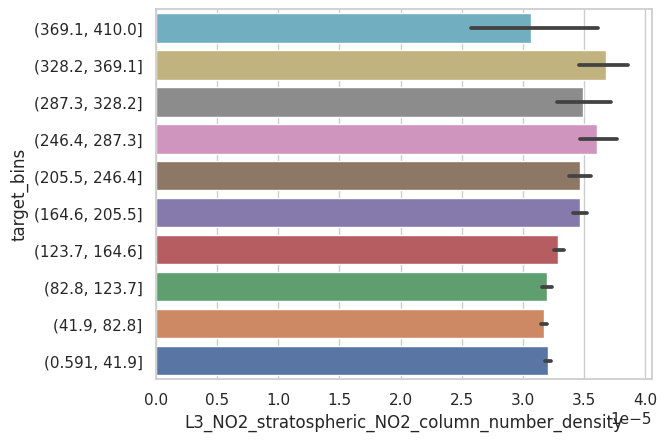

In [40]:
sns.barplot(df_temp, x='L3_NO2_stratospheric_NO2_column_number_density', y='target_bins').invert_yaxis()

- no correlation between target value and stratospheric column density

H6: aerosol index with target value correlation ? 

Text(0, 0.5, 'Pollution Index')

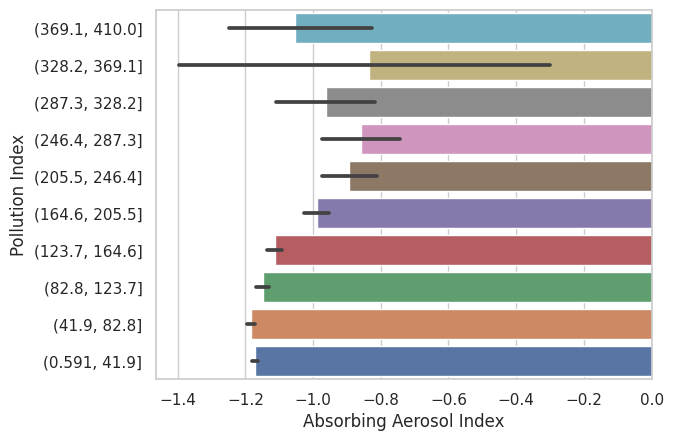

In [41]:
sns.barplot(df_temp, x='L3_AER_AI_absorbing_aerosol_index', y='target_bins').invert_yaxis()
plt.xlabel('Absorbing Aerosol Index')
plt.ylabel('Pollution Index')


- when negativ values = no absorbing aerosol 
- high negativ values of aresol index represent cleaner air. 


H7: AER_AI_sensor_altitude  nega-corr target value

(815000.0, 844493.8976953975)

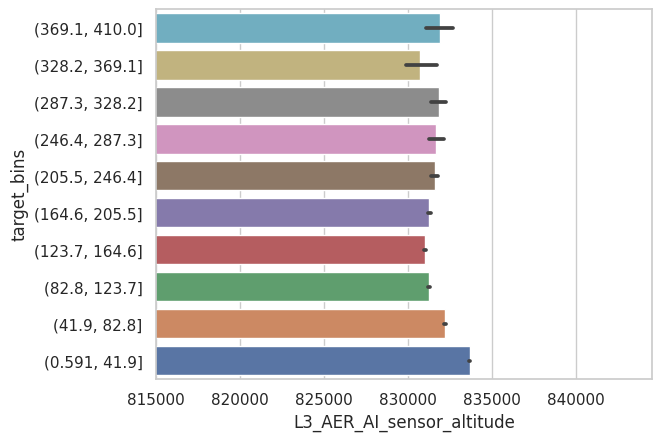

In [42]:
sns.barplot(df_temp, x='L3_AER_AI_sensor_altitude', y='target_bins').invert_yaxis()
plt.xlim(815000, df_temp['L3_AER_AI_sensor_altitude'].max())


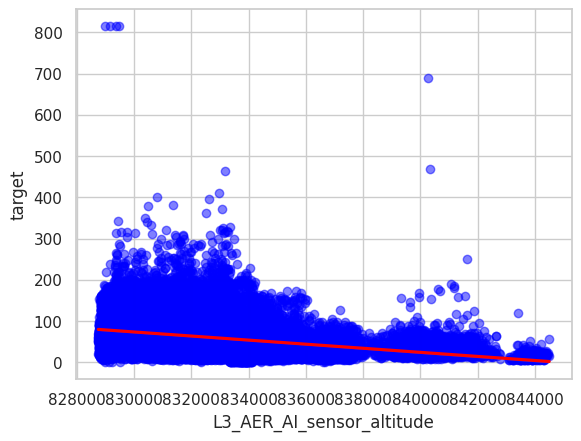

In [43]:
sns.regplot(df, x = 'L3_AER_AI_sensor_altitude', y = 'target',
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}
           )

plt.show()

Cloud 

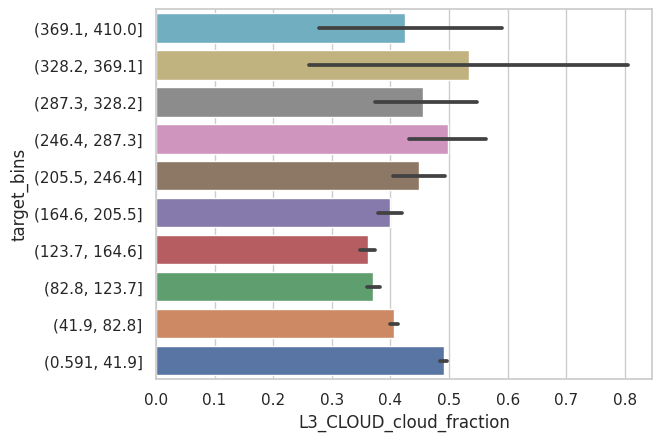

In [44]:
sns.barplot(df_temp, x='L3_CLOUD_cloud_fraction', y='target_bins').invert_yaxis()


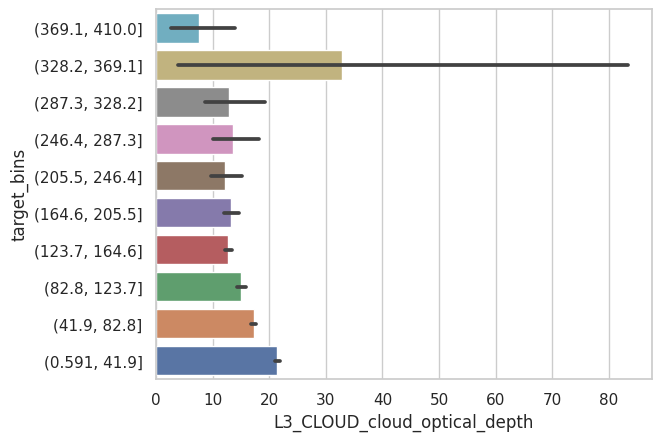

In [45]:
sns.barplot(df_temp, x='L3_CLOUD_cloud_optical_depth', y='target_bins').invert_yaxis()

- the higher could_optical depth the lower the polution


- if we have a lot of clouds we have lower polution 

Summary Results
- polution rises with: 
    - higher gas column number density


- polution decreases with:
    - higher wind velocity
    - later time of day
    - higher negativ absorbing aerosol index
    - higher cloud fraction
    - higher could_optical depth


- unclear relationship between pollution and:
    - humidity
    - sensor azimuth angle
    - sensor altitude 
    - strat. gas column density 
    
    


Date and Target Value

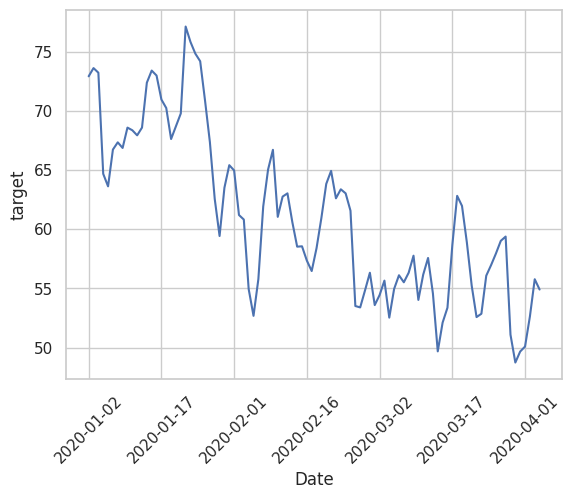

In [46]:
ax=sns.lineplot(df.groupby('Date')['target'].mean().reset_index(), x='Date', y='target')
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
plt.show()

- we have a decrease in air pollution the later in the year 

Tasks before Modelling 

- Check the rest of the hypothesis
- Explore the missing data 
- Find a good way to  impute the missing data 
- Decide what data to bin or OHE 

Data Cleaning 

In [47]:
df['Date'].isnull().sum()

0

In [48]:
df['Place_ID'].isnull().sum()

0

In [49]:
missing_values = df.isnull().sum()
positive_missing_values = missing_values[missing_values > 0]
print(positive_missing_values)

L3_NO2_NO2_column_number_density           2189
L3_NO2_NO2_slant_column_number_density     2189
L3_NO2_absorbing_aerosol_index             2189
L3_NO2_cloud_fraction                      2189
L3_NO2_sensor_altitude                     2189
                                          ...  
L3_CH4_aerosol_optical_depth              24765
L3_CH4_sensor_azimuth_angle               24765
L3_CH4_sensor_zenith_angle                24765
L3_CH4_solar_azimuth_angle                24765
L3_CH4_solar_zenith_angle                 24765
Length: 68, dtype: int64


In [50]:
total_missing_values = df.isnull().sum().sum()
total_elements = df.size

missing_percentage_total = (total_missing_values / total_elements) * 100
print(missing_percentage_total)

15.495311840247375


In [51]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

positive_missing_percentage = missing_percentage[missing_percentage > 0]
pd.DataFrame(positive_missing_percentage).sort_values(by=0, ascending=False)

,0
L3_CH4_solar_zenith_angle,81.045260
L3_CH4_solar_azimuth_angle,81.045260
L3_CH4_sensor_zenith_angle,81.045260
L3_CH4_sensor_azimuth_angle,81.045260
L3_CH4_aerosol_optical_depth,81.045260
...,...
L3_AER_AI_absorbing_aerosol_index,0.644697
L3_AER_AI_sensor_altitude,0.644697
L3_AER_AI_sensor_azimuth_angle,0.644697
L3_AER_AI_sensor_zenith_angle,0.644697


In [52]:
humidity_features = [col for col in df.columns if 'humidity' in col]

# Compute and display percentage of missing values for each of these columns
for feature in humidity_features:
    missing_percentage = (df[feature].isnull().sum() / len(df)) * 100
    print(f"Percentage of missing values in {feature}: {missing_percentage:.2f}%")

Percentage of missing values in relative_humidity_2m_above_ground: 0.00%
Percentage of missing values in specific_humidity_2m_above_ground: 0.00%


In [53]:
humidity_features = [col for col in df.columns if 'sensor_azimuth_angle' in col]

# Compute and display percentage of missing values for each of these columns
for feature in humidity_features:
    missing_percentage = (df[feature].isnull().sum() / len(df)) * 100
    print(f"Percentage of missing values in {feature}: {missing_percentage:.2f}%")

Percentage of missing values in L3_NO2_sensor_azimuth_angle: 7.17%
Percentage of missing values in L3_O3_sensor_azimuth_angle: 0.93%
Percentage of missing values in L3_CO_sensor_azimuth_angle: 17.75%
Percentage of missing values in L3_HCHO_sensor_azimuth_angle: 24.30%
Percentage of missing values in L3_CLOUD_sensor_azimuth_angle: 1.22%
Percentage of missing values in L3_AER_AI_sensor_azimuth_angle: 0.64%
Percentage of missing values in L3_SO2_sensor_azimuth_angle: 23.68%
Percentage of missing values in L3_CH4_sensor_azimuth_angle: 81.05%


In [54]:
humidity_features = [col for col in df.columns if 'sensor_altitude' in col]

# Compute and display percentage of missing values for each of these columns
for feature in humidity_features:
    missing_percentage = (df[feature].isnull().sum() / len(df)) * 100
    print(f"Percentage of missing values in {feature}: {missing_percentage:.2f}%")

Percentage of missing values in L3_NO2_sensor_altitude: 7.16%
Percentage of missing values in L3_CO_sensor_altitude: 17.75%
Percentage of missing values in L3_AER_AI_sensor_altitude: 0.64%


After counting the missing values, we remove the Columns with more than 80% missing values and all values pertaining measurements of the tropopause and stratosphere.

In [55]:
all_features = list(df.columns)

# Features to be removed
features_to_remove = [feature for feature in all_features if "CH4" in feature or "stratospheric" in feature or "target" in feature or "sensor_azimuth_angle" in feature or "tropopause" in feature]

# Creating a new list without the specified features
new_features = [feature for feature in all_features if feature not in features_to_remove]
len(new_features)

61

In [56]:
miss = df.groupby('Place_ID')['L3_CO_CO_column_number_density'].apply(lambda x: x.isna().sum())


In [57]:
count = df.groupby('Place_ID')['Date'].count()


In [58]:
percent = (miss/count)*100
percent

Place_ID
010Q650     7.446809
05EC30X     8.888889
0DPWHX8    10.638298
0GBXTHY    53.191489
0HYPV1N     4.255319
             ...    
YLLOKEY    21.276596
YLZOBFW    29.787234
YPXSK14    11.702128
YSIXKFZ    22.340426
YWSFY6Q    15.384615
Length: 340, dtype: float64

We create a new dataframe with the featrues that we want to keep.

In [59]:
new_features

['Place_ID X Date',
 'Date',
 'Place_ID',
 'precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_density',
 'L3_CO_cloud_height',
 'L3_CO_sensor_altitude',
 'L3_CO_sensor_zenith_angle',
 'L3_CO_solar_azimuth_angle',
 'L3_CO_solar_zenith_angle',
 'L3_HCHO_HCHO_slant_col

We plot each feature's probability distribution to find samples which contain outliers.

In [2]:
"""
numeric_features = df[new_features].select_dtypes(include=['number'])
sns.set(style="whitegrid")
# Create histograms for each numeric feature
for feature in numeric_features.columns:
    plt.figure()  # Create a new figure for each histogram
    sns.histplot(data=df[new_features], x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Count')
# Show all the histograms
plt.show()
"""


'\nnumeric_features = df[new_features].select_dtypes(include=[\'number\'])\nsns.set(style="whitegrid")\n# Create histograms for each numeric feature\nfor feature in numeric_features.columns:\n    plt.figure()  # Create a new figure for each histogram\n    sns.histplot(data=df[new_features], x=feature, kde=True)\n    plt.title(f\'Distribution of {feature}\')\n    plt.xlabel(\'Value\')\n    plt.ylabel(\'Count\')\n# Show all the histograms\nplt.show()\n'

### Feature Engineering
<a id='feature_engineering'/>

For the training, we divide the features into groups. For each group we define whether and how we want to scale the features and/or impute missing values.

In [251]:
# 0. Dummy features (KNN Impute)

dummy_features = [
    'L3_NO2_NO2_column_number_density',
    'L3_O3_O3_column_number_density',
    'L3_CO_CO_column_number_density',
    'L3_CO_H2O_column_number_density',
    'L3_HCHO_tropospheric_HCHO_column_number_density',
    'L3_SO2_SO2_column_number_density',
]



# 1. No Missing Value, Apply Standard Scaler:
features_standard_scaler = [
    'precipitable_water_entire_atmosphere',
    'relative_humidity_2m_above_ground',
    'specific_humidity_2m_above_ground',
    'temperature_2m_above_ground',
    'u_component_of_wind_10m_above_ground',
    'v_component_of_wind_10m_above_ground'
]

# 2. Outliers Present, Missing Values, KNN Impute, Apply Standard Scaler:
features_knn_standard_scaler = [
    'L3_NO2_NO2_column_number_density',
    'L3_NO2_NO2_slant_column_number_density',
    'L3_NO2_absorbing_aerosol_index',
    'L3_NO2_sensor_azimuth_angle',
    'L3_NO2_solar_azimuth_angle',
    'L3_NO2_solar_zenith_angle',
    'L3_NO2_tropospheric_NO2_column_number_density',
    'L3_O3_O3_column_number_density',
    'L3_O3_O3_effective_temperature',
    'L3_O3_solar_azimuth_angle',
    'L3_O3_solar_zenith_angle',
    'L3_CO_CO_column_number_density',
    'L3_CO_H2O_column_number_density',
    'L3_CO_cloud_height',
    'L3_CO_sensor_altitude',
    'L3_CO_sensor_azimuth_angle',
    'L3_CO_solar_zenith_angle',
    'L3_HCHO_HCHO_slant_column_number_density',
    'L3_HCHO_solar_zenith_angle',
    'L3_HCHO_tropospheric_HCHO_column_number_density',
    'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
    'L3_CLOUD_cloud_base_height',
    'L3_CLOUD_cloud_optical_depth',
    'L3_CLOUD_cloud_top_height',
    'L3_SO2_SO2_column_number_density',
    'L3_SO2_SO2_slant_column_number_density',
    'L3_SO2_absorbing_aerosol_index',
    'L3_SO2_solar_zenith_angle',
    'L3_CLOUD_cloud_base_pressure',
    'L3_CLOUD_cloud_top_pressure',
    'L3_CLOUD_solar_zenith_angle',
    'L3_CLOUD_surface_albedo',
    'L3_AER_AI_absorbing_aerosol_index',
    'L3_AER_AI_sensor_altitude',
    'L3_AER_AI_solar_zenith_angle',
    'L3_SO2_SO2_column_number_density_amf'
]

# 3. Only KNN Impute:
features_knn_only = [
    'L3_NO2_cloud_fraction',
    'L3_O3_cloud_fraction',
    'L3_HCHO_cloud_fraction',
    'L3_CLOUD_cloud_fraction'
]

# 4. KNN Impute and Apply Min-Max Scaler:
features_knn_minmax = [
    'L3_NO2_sensor_zenith_angle',
    'L3_O3_sensor_zenith_angle',
    'L3_CO_sensor_zenith_angle',
    'L3_CO_solar_azimuth_angle',
    'L3_HCHO_sensor_zenith_angle',
    'L3_HCHO_solar_azimuth_angle',
    'L3_CLOUD_sensor_zenith_angle',
    'L3_AER_AI_sensor_zenith_angle',
    'L3_AER_AI_solar_azimuth_angle',
    'L3_SO2_sensor_zenith_angle',
    'L3_SO2_solar_azimuth_angle'
]


In the following, we remove outliers by applying criteria that we found by examining the above distribution plots.

First, we convert the data type of the Date Column to datetime64[ns]

In [226]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [227]:
df2=df[df['target']<0.8*df['target'].max()]
df2.shape
df3=df2[abs(df2['L3_CLOUD_cloud_optical_depth'])<100]
df3.shape
df4=df3[abs(df3['L3_CO_CO_column_number_density'])<0.1]
df5=df4[abs(df4['L3_CO_H2O_column_number_density'])<5000]
df6=df5[abs(df5['L3_SO2_SO2_column_number_density'])<0.01]
df7=df6[abs(df6['L3_SO2_SO2_slant_column_number_density'])<0.002]


df7.shape

(20352, 82)

We compile the feature dataframe and the target dataframe.

In [228]:




features=df7[['Place_ID','Date']+features_standard_scaler + features_knn_standard_scaler + features_knn_only + features_knn_minmax]
target=df7['target']

In [68]:
target.shape

(20352,)





<a id='pipeline' />



### Pipeline



Here, we define our pipeline. 

1. we create sub-pipelines for the column transformer, which 
2. we then  combine inside the column transformer. Then,  
3. we define the models for the voting and stacking regressor, which  
4. we combine with the transformer into our main pipeline. Finally,
5. we split our data.

In [229]:
    # 1. Sub - Pipelines

    pipeline_standard_Scaler     = Pipeline([
                                            ( 'standard_scaler', StandardScaler() ),
                                            ])

    pipeline_standard_Scaler_knn = Pipeline([
                                            ( 'imputer',         KNNImputer()     ),
                                            ( 'standard_scaler', StandardScaler() ),
                                            ])


    pipeline_knn                = Pipeline([
                                            ( 'KNN_impute',      KNNImputer()     ),   
                                            ])


    pipeline_knn_and_minmax     = Pipeline([
                                            ( 'KNN_impute',      KNNImputer()     ),   
                                            ( 'minmax',          MinMaxScaler()   ),
                                            ]) 

    # 2. Column Transformer


    my_column_transfomer        = ColumnTransformer([
                                                    ( 'standardscale',               pipeline_standard_Scaler,       features_standard_scaler     ),
                                                    ( 'KNNimpute_and_standardscale', pipeline_standard_Scaler_knn,   features_knn_standard_scaler ),
                                                    ( 'KNNimpute',                   pipeline_knn,                   features_knn_only            ),
                                                    ( 'KNNimpute_and_MinMaxScale',   pipeline_knn_and_minmax,        features_knn_minmax          ),
                                                    ], remainder='drop')

    # 3. Models for the voting and stacking regressor
    
    model1= RandomForestRegressor()
    model2= xgb.XGBRegressor(objective ='reg:squarederror')
    model3= lgb.LGBMRegressor()
    
    voting_model= VotingRegressor(estimators= [
                                              ('rf',  model1 ),
                                              ('xgb', model2 ),
                                              ('lgb', model3 ),          
                                              ]
                                 )
    stacking_model= StackingRegressor(estimators= [
                                              ('rf',  model1 ),
                                              ('xgb', model2 ),
                                              ('lgb', model3 ),          
                                              ],
                                      final_estimator=LinearRegression()
                                 )
    
    # 4. Main Pipeline

    pipeline_model              = Pipeline([
                                           ('ct',      my_column_transfomer    ),                                                                  
                                           ('v_model', voting_model            ), #RandomForestRegressor(): 0.65, xgb.XGBRegressor(objective ='reg:squarederror'): 0.65
                                           ])

    pipeline_model_stack        = Pipeline([
                                           ('ct',      my_column_transfomer      ),                                                                  
                                           ('v_model', stacking_model            ), #RandomForestRegressor(): 0.65, xgb.XGBRegressor(objective ='reg:squarederror'): 0.65
                                           ])
    

# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=None, random_state=777, test_size=0.2)



In [71]:
X_train.shape

(16281, 59)

In [72]:
y_train.shape

(16281,)

<a id='dummy' />

### Baseline Model

In [256]:

pipeline_standard_Scaler_knn = Pipeline([
                                            ( 'imputer',         KNNImputer()     ),
                                            ( 'standard_scaler', StandardScaler() ),
                                            ])

    
dummy_transformer= ColumnTransformer([
                                                    ( 'KNNimpute_and_standardscale', pipeline_standard_Scaler_knn,   dummy_features ),
                                                    ], remainder='drop')

dummy_pipeline_model        = Pipeline([
                                           ('ct',      dummy_transformer             ),                                                                  
                                           ('lreg',    LinearRegression()            ), #RandomForestRegressor(): 0.65, xgb.XGBRegressor(objective ='reg:squarederror'): 0.65
                                           ])




dummy_pipeline_model.fit(X_train[dummy_features], y_train)

print(dummy_pipeline_model.score(X_test[dummy_features], y_test))
mean_squared_error(y_test, dummy_pipeline_model.predict(X_test[dummy_features]))

0.33869475415755756


1416.0594968660719

<a id='prediction' />

### Main Model and predictions

In [73]:
pipeline_model_stack.fit(X_train, y_train)
pipeline_model_stack.score(X_test, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 16281, number of used features: 57
[LightGBM] [Info] Start training from score 64.014354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 13024, number of used features: 57
[LightGBM] [Info] Start training from score 63.787009
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 13025, number of used features: 57
[LightGBM] [Info] Star

0.6814624553893652

We can do a cross validation and we see that the quality of our fit negligibely depends on the Test/Train split.

In [ ]:
cross_val_score(pipeline_model, X_train, y_train, n_jobs=-1, cv=5)

We can optimize our model hyperparameters with the following Grid Search

In [254]:
pipeline_model.get_params()

In [120]:
# Define hyperparameters for GridSearch
param_grid = {
    'model__n_estimators': [90,110],
}

grid_search = GridSearchCV(pipeline_model, param_grid, cv=2, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
print("Best parameters found: ", grid_search.best_params_)

# Evaluate on the test set
y_pred = grid_search.predict(X_test)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 16281, number of used features: 57
[LightGBM] [Info] Start training from score 64.014354
Best parameters found:  {'model__n_estimators': 110}


In [121]:
grid_search.best_score_

0.6461769530474162

Let's plot some results

In [141]:
pd.set_option('display.max_rows',10)

In [165]:
df7['pred_target_stack']=pipeline_model_stack.predict(features)

In [166]:
#pd.melt(df7[df7['Place_ID']=='010Q650'][['Date','target','pred_target_stack']], ['Date'])

In [259]:



r2_test  = r2_score(y_test, pipeline_model_stack.predict(X_test))
r2_train = r2_score(y_train, pipeline_model_stack.predict(X_train))
# Print the R2 score
print(f"Test R2 Score: {r2_test}")
print(f"Train R2 Score: {r2_train}")

Test R2 Score: 0.6808605659705028
Train R2 Score: 0.9059620906590694


Prediction for Place_ID 010Q650

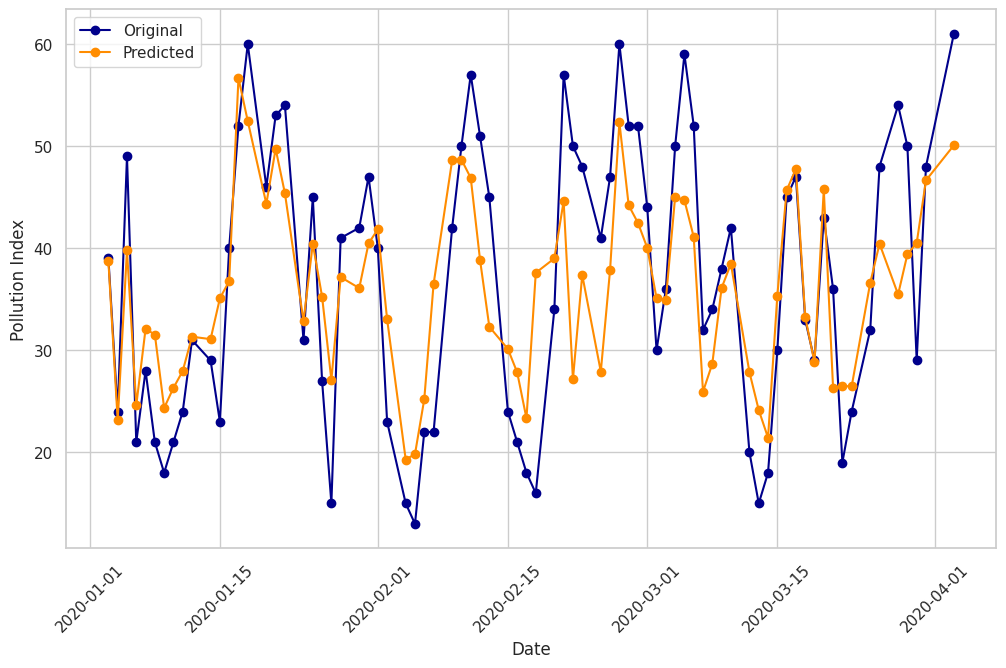

<Figure size 640x480 with 0 Axes>

In [350]:
plt.figure(figsize=(12, 7))# Extract the data for the specific Place_ID
data = df7[df7['Place_ID']=='010Q650']# Plot the original line
plt.plot(data['Date'], data['target'], color='darkblue', marker='o', label='Original')# Plot the predicted line
plt.plot(data['Date'], data['pred_target_stack'], color='darkorange', marker='o', label='Predicted')
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Pollution Index')
plt.legend()
plt.show()

plt.savefig('one_place.png')

Only Train data set:

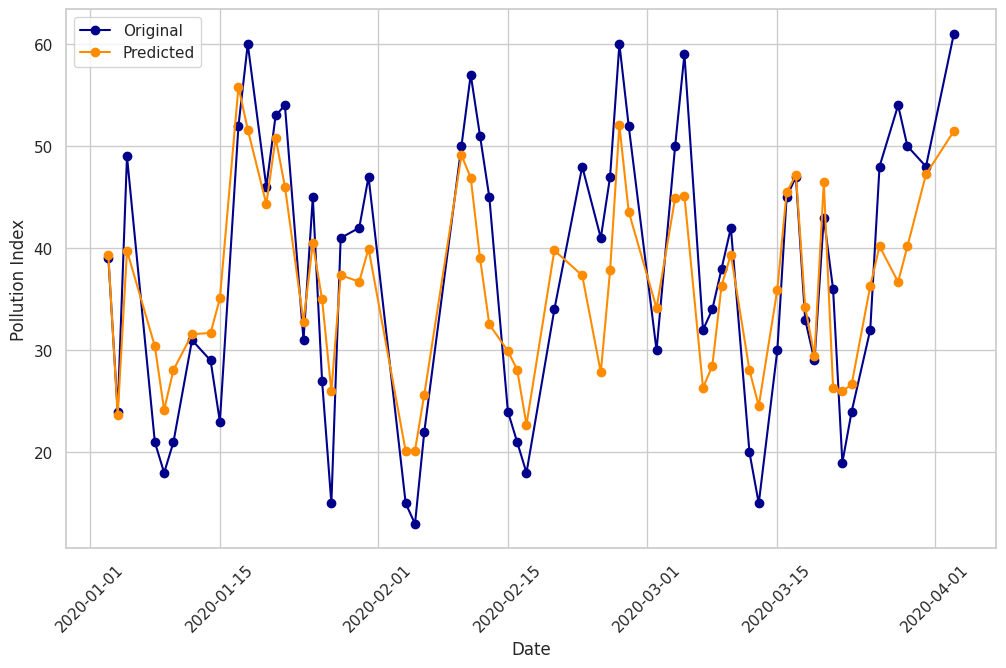

In [157]:
plt.figure(figsize=(12, 7))# Extract the data for the specific Place_ID
data=pd.concat([X_train,y_train], axis=1)
place='010Q650'
data = data[data['Place_ID']==place]# Plot the original line
prediction=pd.DataFrame([data['Date'].index]+ [pipeline_model_stack.predict(X_train[X_train['Place_ID']==place])]).T.sort_values(by=0)[1]


plt.plot(data['Date'].sort_values(), pd.DataFrame(data['target']).reset_index().sort_values(by='index')['target'], color='darkblue', marker='o', label='Original')# Plot the predicted line
plt.plot(data['Date'].sort_values(), prediction, color='darkorange', marker='o', label='Predicted')
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Pollution Index')
plt.legend()

plt.savefig('one_place_only_train.png')

plt.show()



Only Test data set:

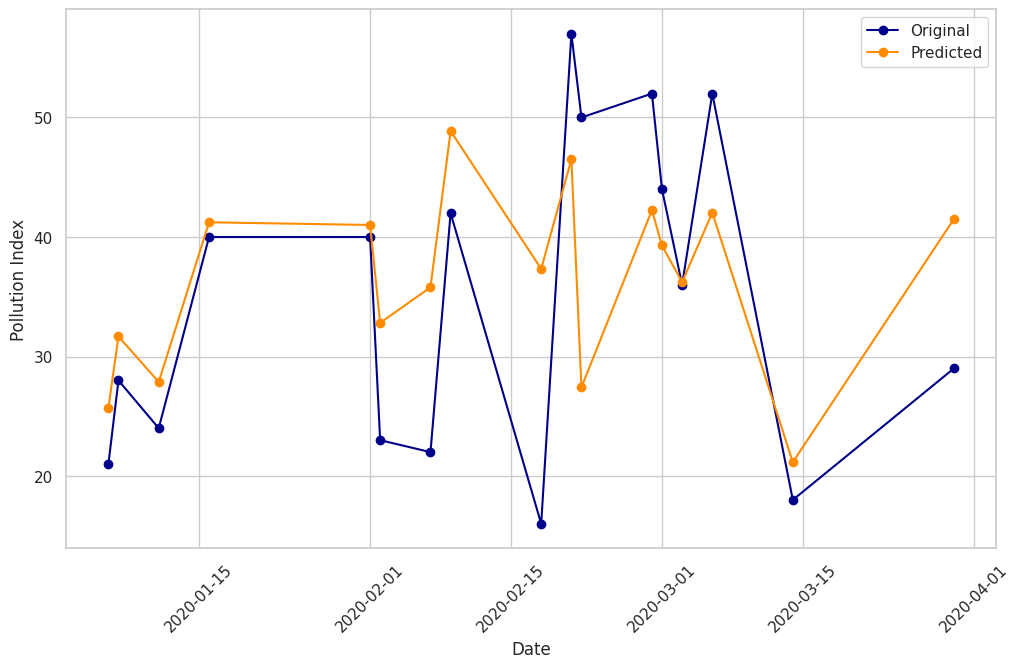

In [156]:
plt.figure(figsize=(12, 7))# Extract the data for the specific Place_ID
data=pd.concat([X_test,y_test], axis=1)
place='010Q650'
data = data[data['Place_ID']==place]# Plot the original line
prediction=pd.DataFrame([data['Date'].index]+ [pipeline_model_stack.predict(X_test[X_test['Place_ID']==place])]).T.sort_values(by=0)[1]


plt.plot(data['Date'].sort_values(), pd.DataFrame(data['target']).reset_index().sort_values(by='index')['target'], color='darkblue', marker='o', label='Original')# Plot the predicted line
plt.plot(data['Date'].sort_values(), prediction, color='darkorange', marker='o', label='Predicted')
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Pollution Index')
plt.legend()

plt.savefig('one_place_only_test.png')

plt.show()



Mean Squared Errors for (the full) Train and Test data sets:

In [163]:
print(f"MSE of the Training data set: {mean_squared_error(y_train, pipeline_model_stack.predict(X_train)):.2f}")
print(f"MSE of the Test data set: {mean_squared_error(y_test, pipeline_model_stack.predict(X_test)):.2f}")


#mean_squared_error(y_train, pipeline_model_stack.predict(X_train))
#mean_squared_error(y_test, pipeline_model_stack.predict(X_test))

MSE of the Training data set: 212.04
MSE of the Test data set: 682.09


Pollution (averaged over all 'Place_ID') as a function of time ('Date').

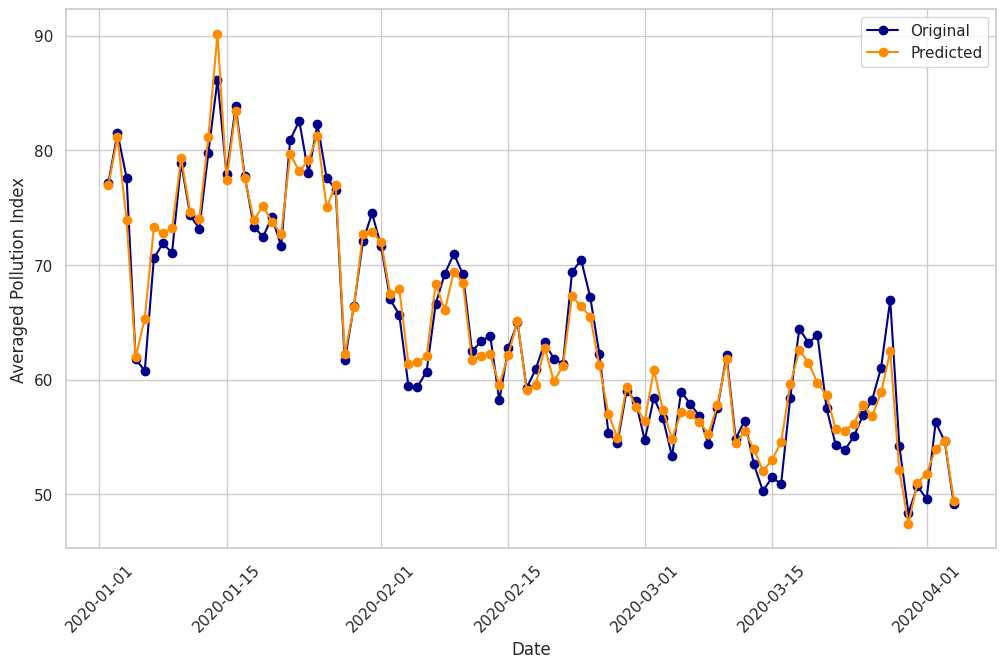

In [298]:
plt.figure(figsize=(12, 7))# Extract the data for the specific Place_ID
data = df7.select_dtypes(include=['number', 'datetime64[ns]']).groupby('Date')[['target','pred_target_stack']].mean().reset_index() # Plot the original line
plt.plot(data['Date'], data['target'], color='darkblue', marker='o', label='Original')# Plot the predicted line
plt.plot(data['Date'], data['pred_target_stack'], color='darkorange', marker='o', label='Predicted')
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Averaged Pollution Index')
plt.legend()
plt.show()

plt.savefig('av_over_all_ci.png')

Bin-averaged pollution index as function of CO column density.

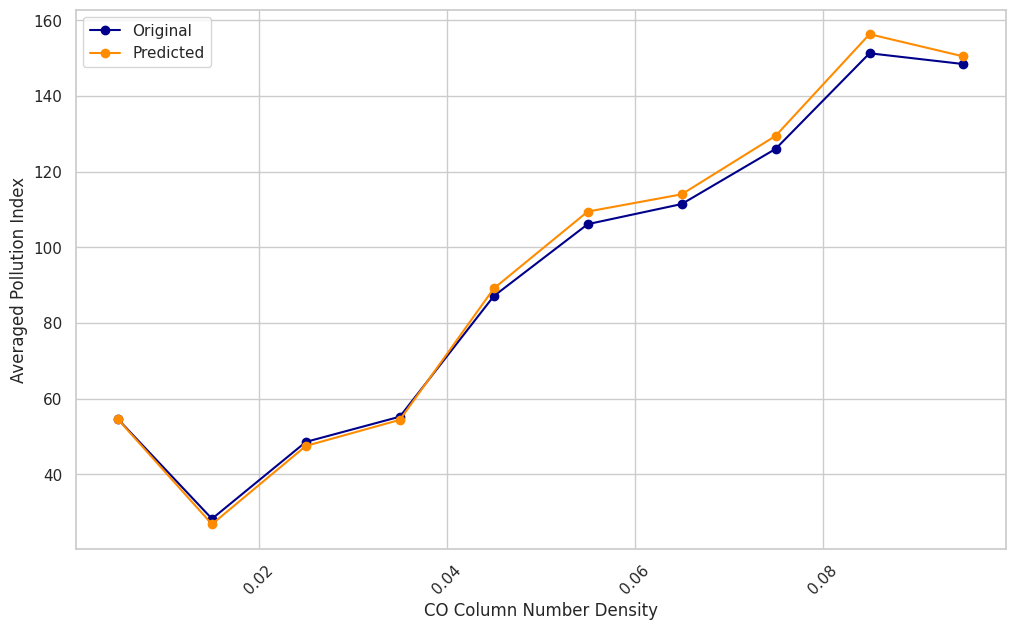

In [168]:

df8=df7.copy()
df8['bin_L3_CO_CO_column_number_density']=pd.cut(df7['L3_CO_CO_column_number_density'],bins=10, labels=[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095]  )
df8


plt.figure(figsize=(12, 7))# Extract the data for the specific Place_ID
data = df8.groupby('bin_L3_CO_CO_column_number_density')[['target','pred_target_stack']].mean().reset_index()
plt.plot(data['bin_L3_CO_CO_column_number_density'], data['target'], color='darkblue', marker='o', label='Original')# Plot the predicted line
plt.plot(data['bin_L3_CO_CO_column_number_density'], data['pred_target_stack'], color='darkorange', marker='o', label='Predicted')
plt.xticks(rotation=45)

plt.xlabel('CO Column Number Density')
plt.ylabel('Averaged Pollution Index')
plt.legend()
plt.show()

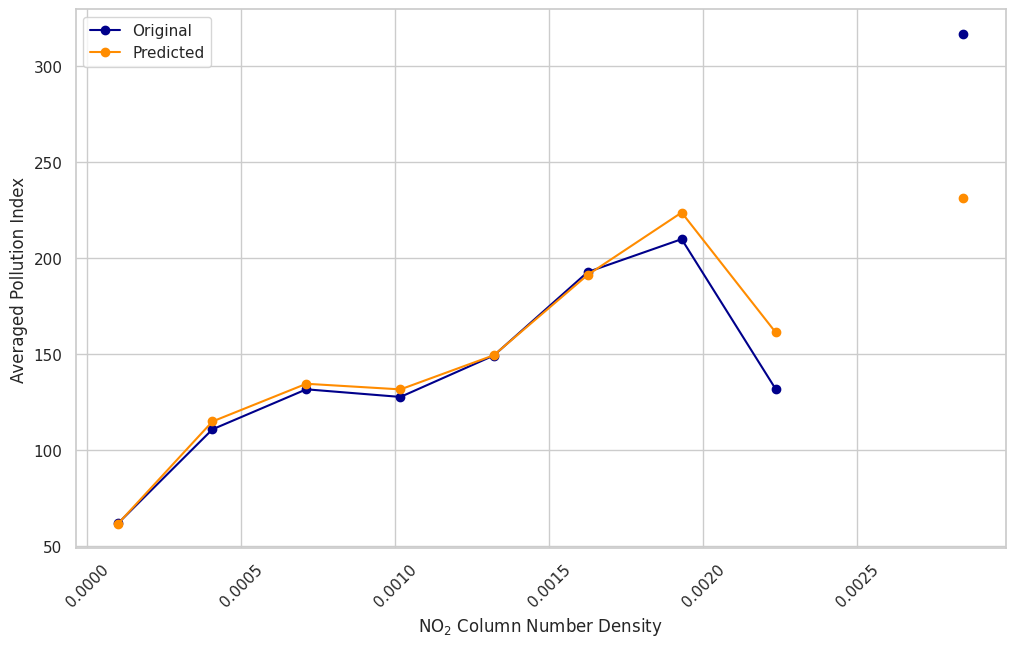

In [213]:

quantity='L3_NO2_NO2_column_number_density'


df8=df7.copy()
df8[quantity]=pd.cut(df7[quantity],bins=10).apply(lambda x: x.mid)

plt.figure(figsize=(12, 7))# Extract the data for the specific Place_ID
data = df8.groupby(quantity)[['target','pred_target_stack']].mean().reset_index()
plt.plot(data[quantity], data['target'], color='darkblue', marker='o', label='Original')# Plot the predicted line
plt.plot(data[quantity], data['pred_target_stack'], color='darkorange', marker='o', label='Predicted')
plt.xticks(rotation=45)

plt.xlabel(r'NO$_2$ Column Number Density')
plt.ylabel('Averaged Pollution Index')
plt.legend()
plt.show()


In [212]:
"""
plt.figure(figsize=(12, 7))# Extract the data for the specific Place_ID

quantity_X='L3_O3_O3_column_number_density'

quantity_Y='L3_NO2_NO2_column_number_density'



df8=df7.copy()
df8[quantity_X]=pd.cut(df7[quantity_X],bins=10).apply(lambda x: x.mid)


plt.plot(df8.groupby(quantity_X)[quantity_Y].mean(), color='darkblue', marker='o', label='CO_vs_NO2')# Plot the predicted line




plt.xticks(rotation=45)

plt.xlabel(r'O$_3$ column number density')
plt.ylabel(r'NO$_2$ column number density')
plt.legend()
plt.show()
"""


"\nplt.figure(figsize=(12, 7))# Extract the data for the specific Place_ID\n\nquantity_X='L3_O3_O3_column_number_density'\n\nquantity_Y='L3_NO2_NO2_column_number_density'\n\n\n\ndf8=df7.copy()\ndf8[quantity_X]=pd.cut(df7[quantity_X],bins=10).apply(lambda x: x.mid)\n\n\nplt.plot(df8.groupby(quantity_X)[quantity_Y].mean(), color='darkblue', marker='o', label='CO_vs_NO2')# Plot the predicted line\n\n\n\n\nplt.xticks(rotation=45)\n\nplt.xlabel(r'O$_3$ column number density')\nplt.ylabel(r'NO$_2$ column number density')\nplt.legend()\nplt.show()\n"